In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data Collection

In [2]:
# reading a csv file using pandas library
dsort=pd.read_csv("C:/Users/manth/Assignment/Simple linear/delivery_time.csv")
dsort.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Exploratory Data Analysis (EDA)

In [3]:
dsort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
DeliveryTime    21 non-null float64
SortingTime     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
print(dsort.isnull().sum())      #checking for null value

DeliveryTime    0
SortingTime     0
dtype: int64


In [5]:
dsort.describe() 

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


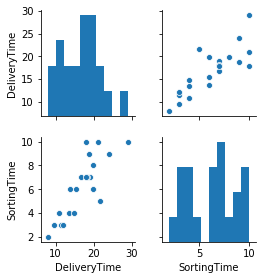

In [6]:
import seaborn as sns
sns.pairplot(dsort,height= 2)

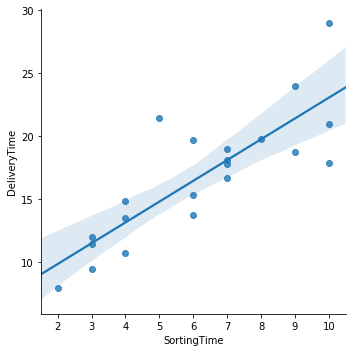

In [7]:
sns.lmplot(x = 'SortingTime', y='DeliveryTime',data=dsort)

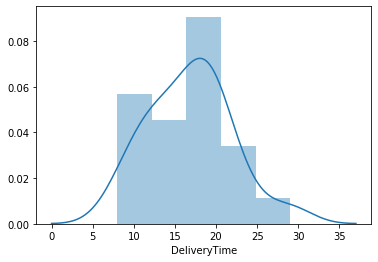

In [8]:
sns.distplot(dsort['DeliveryTime'])

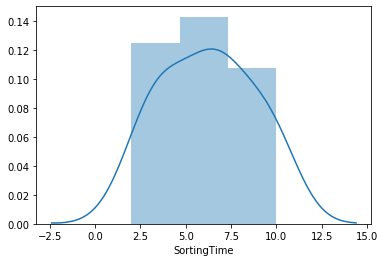

In [9]:
sns.distplot(dsort['SortingTime'])

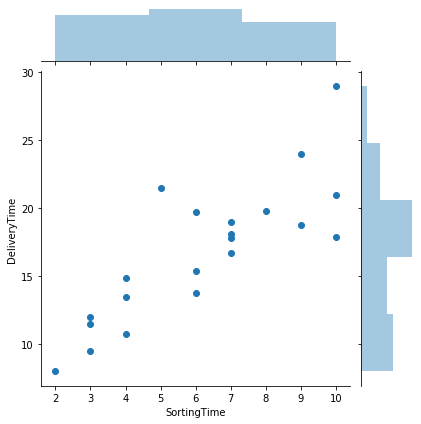

In [10]:
sns.jointplot(data = dsort, x = 'SortingTime', y='DeliveryTime')

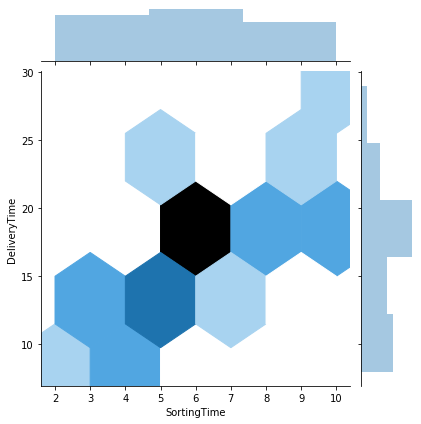

In [11]:
sns.jointplot(x = 'SortingTime', y='DeliveryTime', kind='hex',data=dsort)

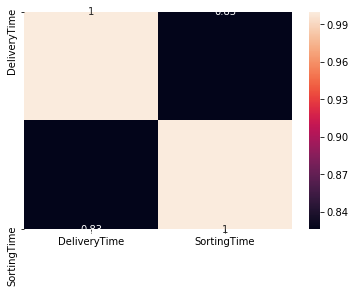

In [12]:
sns.heatmap(dsort.corr(),annot=True)

In [13]:
dsort.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


# Linear Regression Model

In [14]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf
model1 = smf.ols("DeliveryTime~SortingTime",data=dsort).fit()


In [15]:
model1.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           3.98e-06
Time:                        18:47:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model1.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
SortingTime,1.108673,2.189367


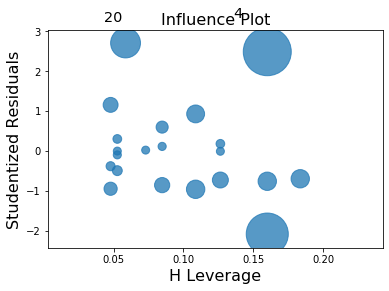

In [18]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)
plt.show()

In [19]:
pred = model1.predict(dsort.iloc[:,1])
pred.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

In [20]:
np.sqrt(np.mean((pred-dsort.DeliveryTime)**2))

2.791650327061766

In [21]:
pred.corr(dsort.DeliveryTime)

0.8259972607955325

Text(0, 0.5, 'Delivery Time')

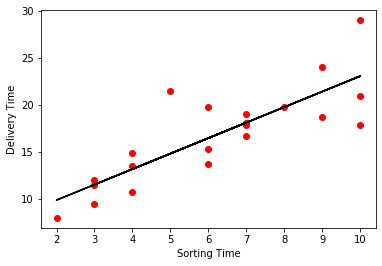

In [22]:
plt.scatter(x=dsort['SortingTime'],y=dsort['DeliveryTime'],color='red');plt.plot(dsort['SortingTime'],pred,color='black');
plt.xlabel('Sorting Time');plt.ylabel('Delivery Time')

Text(0, 0.5, 'Predicted')

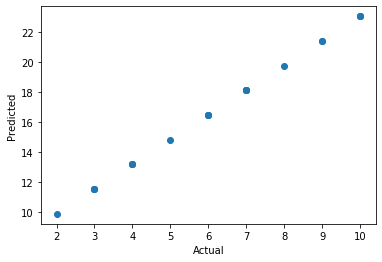

In [23]:
plt.scatter(x=dsort.SortingTime, y=pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [24]:
# Quadratic model
dsort["SortingTime_square"]=dsort.SortingTime*dsort.SortingTime
dsort.head()

,DeliveryTime,SortingTime,SortingTime_square
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [25]:
model_quad=smf.ols("DeliveryTime~SortingTime+SortingTime_square",data=dsort).fit()
model_quad.params

Intercept             3.522234
SortingTime           2.813002
SortingTime_square   -0.093198
dtype: float64

In [26]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           2.39e-05
Time:                        18:47:23   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.5222      4.160      0.847      0.408      -5.217      12.261
SortingTime            2.8130      1.461      1.926      0.070      -0.256       5.882
SortingTime_square    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model_quad.conf_int(0.05)

,0,1
Intercept,-5.216926,12.261394
SortingTime,-0.256067,5.882070
SortingTime_square,-0.334994,0.148598


In [28]:
pred_quad=model_quad.predict(dsort.iloc[:,:3])
pred_quad.head()

0    22.332430
1    13.283069
2    17.045108
3    21.290194
4    22.332430
dtype: float64

In [29]:
#rmse for quadratic model
rmse_quad=np.sqrt(np.mean((pred_quad-dsort.DeliveryTime)**2))
rmse_quad

2.742148203780122

Text(0, 0.5, 'Predicted')

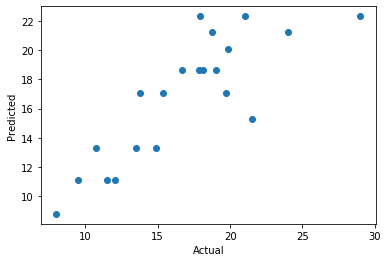

In [30]:
plt.scatter(x=dsort.DeliveryTime, y=pred_quad)
plt.xlabel("Actual")
plt.ylabel("Predicted")